# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

# Map(image) classifier

In [21]:
from PIL import Image
import os, os.path
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img

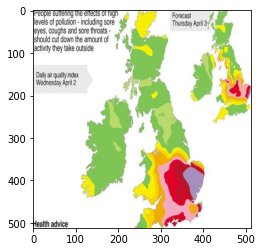

In [22]:
image = load_img('mapTrainA/dataTrain/map/0.jpg')
plt.imshow(image)

In [23]:
img_width=150
img_height=150
batch_size=20
input_shape = (img_width, img_height, 3)

In [28]:

# https://www.tensorflow.org/tutorials/load_data/images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
    rescale = 1./ 255,
    shear_range = 0.3,
    zoom_range = [0.6,1.0],
    brightness_range = [0.6,1.0],
    rotation_range = 90,
    horizontal_flip = True,
    validation_split = 0.2
)

#---------------------------------------------

train_generator = train_datagen.flow_from_directory(
    'mapTrainA/dataTrain',
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    seed = 42,
    subset='training'
    
)

#---------------------------------------------

valid_generator = train_datagen.flow_from_directory(
    'mapTrainA/dataValidation',
    target_size = (img_width, img_height),
    batch_size = batch_size,
    #class_mode='binary',
    class_mode = 'categorical',
    seed = 42,
    subset='validation'
    
)
className = ['map', 'other']

Found 9026 images belonging to 2 classes.
Found 958 images belonging to 2 classes.


In [29]:
X, y = next(train_generator)

In [30]:
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

map


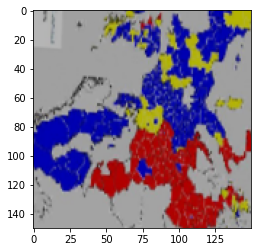

In [33]:
index = 10
print(className[np.argmax(y[index])])
plt.imshow(X[index])

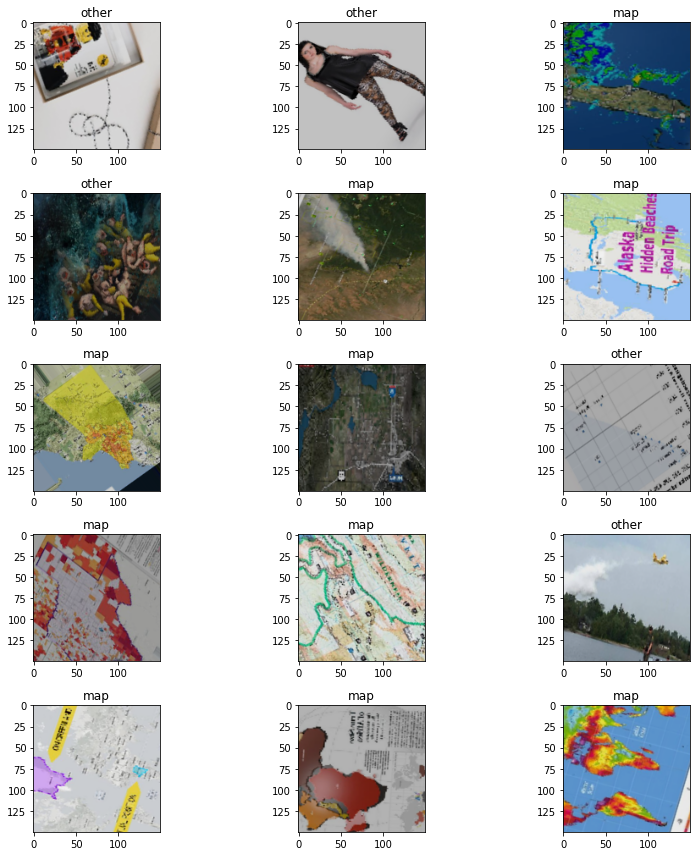

In [34]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.title(className[np.argmax(Y_batch[0])])
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Build a model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
epochs = 30
train_samples = 300
validation_samples = 300

hist = model.fit(
    train_generator,
    steps_per_epoch= train_samples // batch_size,
    validation_data=valid_generator,
    validation_steps=validation_samples // batch_size,
    epochs=epochs,
    )

Epoch 1/30
15/15 [==============================] - 5s 309ms/step - loss: 0.6921 - accuracy: 0.5533 - val_loss: 0.6389 - val_accuracy: 0.6467
Epoch 2/30
15/15 [==============================] - 4s 285ms/step - loss: 0.6410 - accuracy: 0.6533 - val_loss: 0.6823 - val_accuracy: 0.5967
Epoch 3/30
15/15 [==============================] - 4s 276ms/step - loss: 0.5722 - accuracy: 0.7400 - val_loss: 0.9448 - val_accuracy: 0.4167
Epoch 4/30
15/15 [==============================] - 4s 267ms/step - loss: 0.6481 - accuracy: 0.6433 - val_loss: 0.6354 - val_accuracy: 0.6800
Epoch 5/30
15/15 [==============================] - 4s 266ms/step - loss: 0.6026 - accuracy: 0.6967 - val_loss: 0.6017 - val_accuracy: 0.7300
Epoch 6/30
15/15 [==============================] - 4s 269ms/step - loss: 0.5604 - accuracy: 0.7533 - val_loss: 0.6488 - val_accuracy: 0.6967
Epoch 7/30
15/15 [==============================] - 4s 264ms/step - loss: 0.5676 - accuracy: 0.7367 - val_loss: 0.5912 - val_accuracy: 0.7267
Epoch 

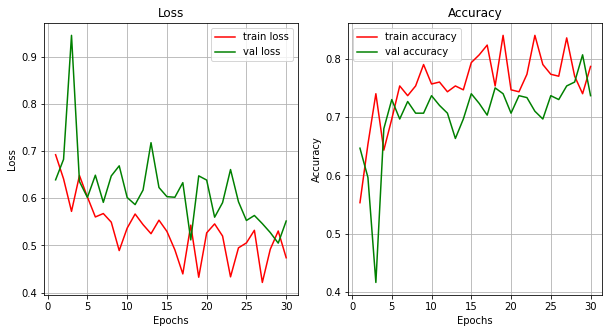

In [38]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [39]:
modelSecond = Sequential()
modelSecond.add(Conv2D(128, (3, 3), input_shape=input_shape))
modelSecond.add(Activation('relu'))
modelSecond.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelSecond.add(Conv2D(128, (3, 3)))
modelSecond.add(Activation('relu'))
modelSecond.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelSecond.add(Conv2D(128, (3, 3)))
modelSecond.add(Activation('relu'))
modelSecond.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelSecond.add(Dropout(0.30))

modelSecond.add(Flatten())
modelSecond.add(Dense(128))
modelSecond.add(Activation("relu"))
modelSecond.add(Dense(64))
modelSecond.add(Activation('relu'))
modelSecond.add(Dropout(0.30))
modelSecond.add(Dense(2))
modelSecond.add(Activation("sigmoid"))

In [40]:
modelSecond.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
epochs = 30
train_samples = 500
validation_samples = 500

histSecond = modelSecond.fit(
    train_generator,
    steps_per_epoch= train_samples // batch_size,
    validation_data=valid_generator,
    validation_steps=validation_samples // batch_size,
    epochs=epochs,
    # verbose=2,
    )

Epoch 1/30
25/25 [==============================] - 8s 309ms/step - loss: 0.7025 - accuracy: 0.5240 - val_loss: 0.6798 - val_accuracy: 0.5140
Epoch 2/30
25/25 [==============================] - 8s 311ms/step - loss: 0.6511 - accuracy: 0.6400 - val_loss: 0.6573 - val_accuracy: 0.6440
Epoch 3/30
25/25 [==============================] - 7s 290ms/step - loss: 0.6471 - accuracy: 0.7140 - val_loss: 0.6122 - val_accuracy: 0.7060
Epoch 4/30
25/25 [==============================] - 8s 319ms/step - loss: 0.5917 - accuracy: 0.7520 - val_loss: 0.6189 - val_accuracy: 0.7400
Epoch 5/30
25/25 [==============================] - 7s 302ms/step - loss: 0.5971 - accuracy: 0.7340 - val_loss: 0.5891 - val_accuracy: 0.7220
Epoch 6/30
25/25 [==============================] - 7s 280ms/step - loss: 0.5641 - accuracy: 0.7640 - val_loss: 0.5976 - val_accuracy: 0.6940
Epoch 7/30
25/25 [==============================] - 7s 286ms/step - loss: 0.5599 - accuracy: 0.7520 - val_loss: 0.5693 - val_accuracy: 0.7300
Epoch 

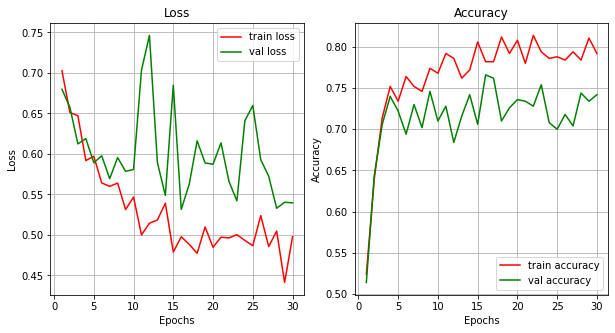

In [42]:
historyData = histSecond.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [43]:
modelThird = Sequential()
modelThird.add(Conv2D(128, (3, 3), input_shape=input_shape))
modelThird.add(Activation('relu'))
modelThird.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelThird.add(Conv2D(128, (3, 3)))
modelThird.add(Activation('relu'))
modelThird.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelThird.add(Conv2D(128, (3, 3)))
modelThird.add(Activation('relu'))
modelThird.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

modelThird.add(Dropout(0.30))

modelThird.add(Flatten())
modelThird.add(Dense(128))
modelThird.add(Activation("relu"))
modelThird.add(Dropout(0.30))
modelThird.add(Dense(64))
modelThird.add(Activation('relu'))
modelThird.add(Dropout(0.30))
modelThird.add(Dense(2))
modelThird.add(Activation("sigmoid"))
modelThird.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
from keras.callbacks import EarlyStopping

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
earlystop = EarlyStopping(monitor='loss', patience=5, verbose=0, mode='auto')

epochs = 30
train_samples = 500
validation_samples = 500

histThird = modelThird.fit(
    train_generator,
    steps_per_epoch = train_samples // batch_size,
    validation_data = valid_generator,
    validation_steps = validation_samples // batch_size,
    epochs = epochs,
    callbacks = [earlystop],
    # verbose=2,
    )

Epoch 1/30
25/25 [==============================] - 8s 319ms/step - loss: 0.4128 - accuracy: 0.8040 - val_loss: 0.5149 - val_accuracy: 0.7340
Epoch 2/30
25/25 [==============================] - 7s 289ms/step - loss: 0.4117 - accuracy: 0.8080 - val_loss: 0.5019 - val_accuracy: 0.7280
Epoch 3/30
25/25 [==============================] - 8s 313ms/step - loss: 0.4459 - accuracy: 0.8100 - val_loss: 0.4705 - val_accuracy: 0.7560
Epoch 4/30
25/25 [==============================] - 7s 290ms/step - loss: 0.4075 - accuracy: 0.8300 - val_loss: 0.4719 - val_accuracy: 0.7540
Epoch 5/30
25/25 [==============================] - 7s 289ms/step - loss: 0.3621 - accuracy: 0.8360 - val_loss: 0.4806 - val_accuracy: 0.7640
Epoch 6/30
25/25 [==============================] - 7s 288ms/step - loss: 0.4313 - accuracy: 0.8320 - val_loss: 0.4587 - val_accuracy: 0.7440
Epoch 7/30
25/25 [==============================] - 7s 286ms/step - loss: 0.3666 - accuracy: 0.8360 - val_loss: 0.4662 - val_accuracy: 0.7740
Epoch 

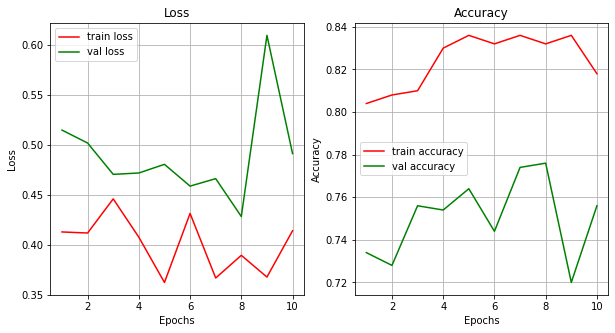

In [48]:
historyData = histThird.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [49]:
nameMode = 'map_image_classifier_cnn_model_A.h5'
# model.save(nameMode)
# modelSecond.save(nameMode)
modelThird.save(nameMode)

In [50]:
# load the saved model
import keras
from keras.preprocessing.image import load_img
import pandas as pd

nameMode = 'map_image_classifier_cnn_model_A.h5'
model_loaded = keras.models.load_model(nameMode)

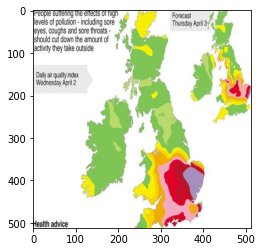

In [51]:
image = load_img('mapTrainA/dataTrain/map/0.jpg')
plt.imshow(image)

In [52]:
x = image.resize((150, 150))
x = np.array(x)/255.0
result = model_loaded.predict(x[np.newaxis, ...])
df = pd.DataFrame(data =result,columns=['map','other'])
df

,map,other
0,0.826975,0.172683


Testing

In [54]:
import urllib.request
# urllib.request.urlretrieve('https://raw.githubusercontent.com/NamjuLee/data/master/img/map/ShadedReliefMap.jpg', "image.jpg")
urllib.request.urlretrieve('https://www.boredpanda.com/blog/wp-content/uuuploads/fun-maps/fun-maps-31.jpg', "image.jpg")

('image.jpg', <http.client.HTTPMessage at 0x1a54f463340>)

,map,no map
0,0.694571,0.317256


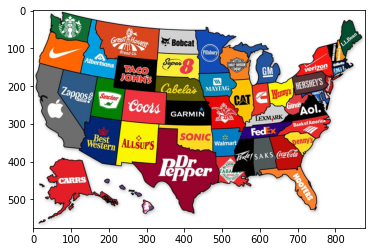

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

x = Image.open('image.jpg')
plt.imshow(x)
x = np.array(x.resize((150, 150)))/255.
result = model_loaded.predict(x[np.newaxis, ...])
df = pd.DataFrame(data =result,columns=['map','no map'])
df

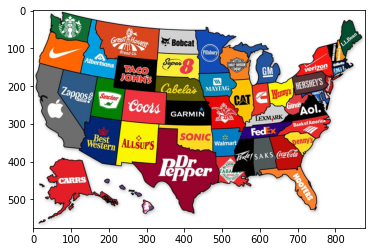

        map     other
0  0.694571  0.317256


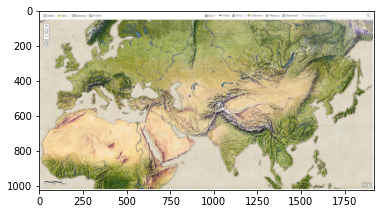

        map     other
0  0.974501  0.024668


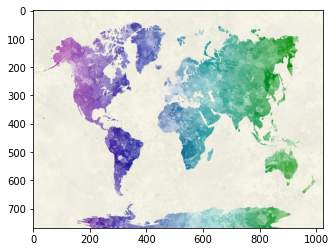

        map     other
0  0.759337  0.228587


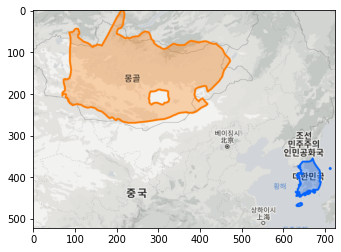

        map     other
0  0.905291  0.090769


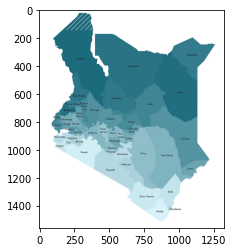

        map     other
0  0.581489  0.420091


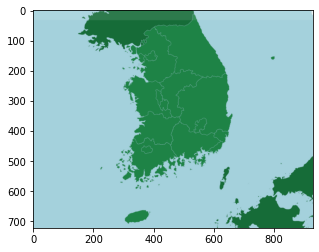

        map    other
0  0.705319  0.29695


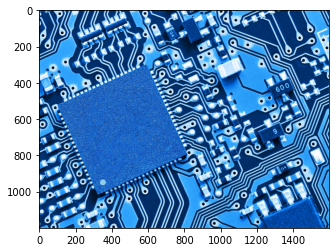

        map     other
0  0.093254  0.901506


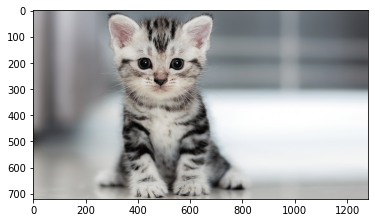

       map     other
0  0.06209  0.937728


In [56]:
urls = [
    'https://www.boredpanda.com/blog/wp-content/uuuploads/fun-maps/fun-maps-31.jpg',
    'https://raw.githubusercontent.com/NamjuLee/data/master/img/map/ShadedReliefMap.jpg',
    'https://st2.depositphotos.com/1047308/7670/i/950/depositphotos_76706353-stock-photo-world-map-in-watercolor-cool.jpg',
    'https://blog.kakaocdn.net/dn/1NFJH/btq9C8XcSOA/jJ4k3PaD6AQxGDfmo4qBi0/img.png',
    'https://www.worldatlas.com/r/w1200/upload/ab/e1/d6/counties-of-kenya-map.png',
    'https://www.geoguessr.com/seterra/mapimage/3180.png',
    'https://images.news18.com/ibnlive/uploads/2021/11/computer-memory-chip-16359034464x3.png',
    'https://ga-petfoodpartners.co.uk/content/uploads/2021/07/Kitten-Header-Image.png',
]

for url in urls:
    urllib.request.urlretrieve(url, "image.jpg")
    x = Image.open('image.jpg')
    x = x.convert('RGB')
    plt.imshow(x)
    plt.show()
    x = np.array(x.resize((150, 150)))/255.
    result = model_loaded.predict(x[np.newaxis, ...])
    df = pd.DataFrame(data =result,columns=['map','other'])
    print(df)
    print('===========================================================================')
